In [ ]:
!pip install keras-preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 740.4 kB/s eta 0:00:00


In [ ]:
# System libraries
from pathlib import Path
import os.path
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Dense, Dropout
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.cm as cm

In [ ]:
# !pip install ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
dataset = "/content/drive/MyDrive/Birds_data/train"
walk_through_dir(dataset);

There are 10 directories and 0 images in '/content/drive/MyDrive/Birds_data/train'.
There are 0 directories and 132 images in '/content/drive/MyDrive/Birds_data/train/ALBATROSS'.
There are 0 directories and 160 images in '/content/drive/MyDrive/Birds_data/train/LONG-EARED OWL'.
There are 0 directories and 154 images in '/content/drive/MyDrive/Birds_data/train/AFRICAN EMERALD CUCKOO'.
There are 0 directories and 195 images in '/content/drive/MyDrive/Birds_data/train/RAZORBILL'.
There are 0 directories and 207 images in '/content/drive/MyDrive/Birds_data/train/RED TAILED HAWK'.
There are 0 directories and 164 images in '/content/drive/MyDrive/Birds_data/train/GRAY KINGBIRD'.
There are 0 directories and 187 images in '/content/drive/MyDrive/Birds_data/train/AFRICAN PIED HORNBILL'.
There are 0 directories and 176 images in '/content/drive/MyDrive/Birds_data/train/GOLDEN CHEEKED WARBLER'.
There are 0 directories and 170 images in '/content/drive/MyDrive/Birds_data/train/AMERICAN BITTERN'.
T

In [ ]:
image_dir = Path(dataset)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.png'))

In [ ]:
filepaths

[PosixPath('/content/drive/MyDrive/Birds_data/train/ALBATROSS/005.jpg'),
 PosixPath('/content/drive/MyDrive/Birds_data/train/ALBATROSS/001.jpg'),
 PosixPath('/content/drive/MyDrive/Birds_data/train/ALBATROSS/002.jpg'),
 PosixPath('/content/drive/MyDrive/Birds_data/train/ALBATROSS/004.jpg'),
 PosixPath('/content/drive/MyDrive/Birds_data/train/ALBATROSS/003.jpg'),
 PosixPath('/content/drive/MyDrive/Birds_data/train/ALBATROSS/033.jpg'),
 PosixPath('/content/drive/MyDrive/Birds_data/train/ALBATROSS/024.jpg'),
 PosixPath('/content/drive/MyDrive/Birds_data/train/ALBATROSS/035.jpg'),
 PosixPath('/content/drive/MyDrive/Birds_data/train/ALBATROSS/022.jpg'),
 PosixPath('/content/drive/MyDrive/Birds_data/train/ALBATROSS/014.jpg'),
 PosixPath('/content/drive/MyDrive/Birds_data/train/ALBATROSS/018.jpg'),
 PosixPath('/content/drive/MyDrive/Birds_data/train/ALBATROSS/010.jpg'),
 PosixPath('/content/drive/MyDrive/Birds_data/train/ALBATROSS/031.jpg'),
 PosixPath('/content/drive/MyDrive/Birds_data/train

In [ ]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

In [ ]:
image_df

Filepath      Label
0     /content/drive/MyDrive/Birds_data/train/ALBATR...  ALBATROSS
1     /content/drive/MyDrive/Birds_data/train/ALBATR...  ALBATROSS
2     /content/drive/MyDrive/Birds_data/train/ALBATR...  ALBATROSS
3     /content/drive/MyDrive/Birds_data/train/ALBATR...  ALBATROSS
4     /content/drive/MyDrive/Birds_data/train/ALBATR...  ALBATROSS
...                                                 ...        ...
1690  /content/drive/MyDrive/Birds_data/train/MYNA/1...       MYNA
1691  /content/drive/MyDrive/Birds_data/train/MYNA/1...       MYNA
1692  /content/drive/MyDrive/Birds_data/train/MYNA/1...       MYNA
1693  /content/drive/MyDrive/Birds_data/train/MYNA/1...       MYNA
1694  /content/drive/MyDrive/Birds_data/train/MYNA/1...       MYNA

[1695 rows x 2 columns]

In [ ]:
# # Get the labels and count
# label_counts = image_df['Label'].value_counts()[:10]

# plt.figure(figsize=(20, 6))
# sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8, palette='dark:salmon_r')
# plt.title('Distribution of Top 10 Labels in Image Dataset', fontsize=16)
# plt.xlabel('Label', fontsize=14)
# plt.ylabel('Count', fontsize=14)
# plt.xticks(rotation=45)
# plt.show()

<ipython-input-11-5b40b40d797a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


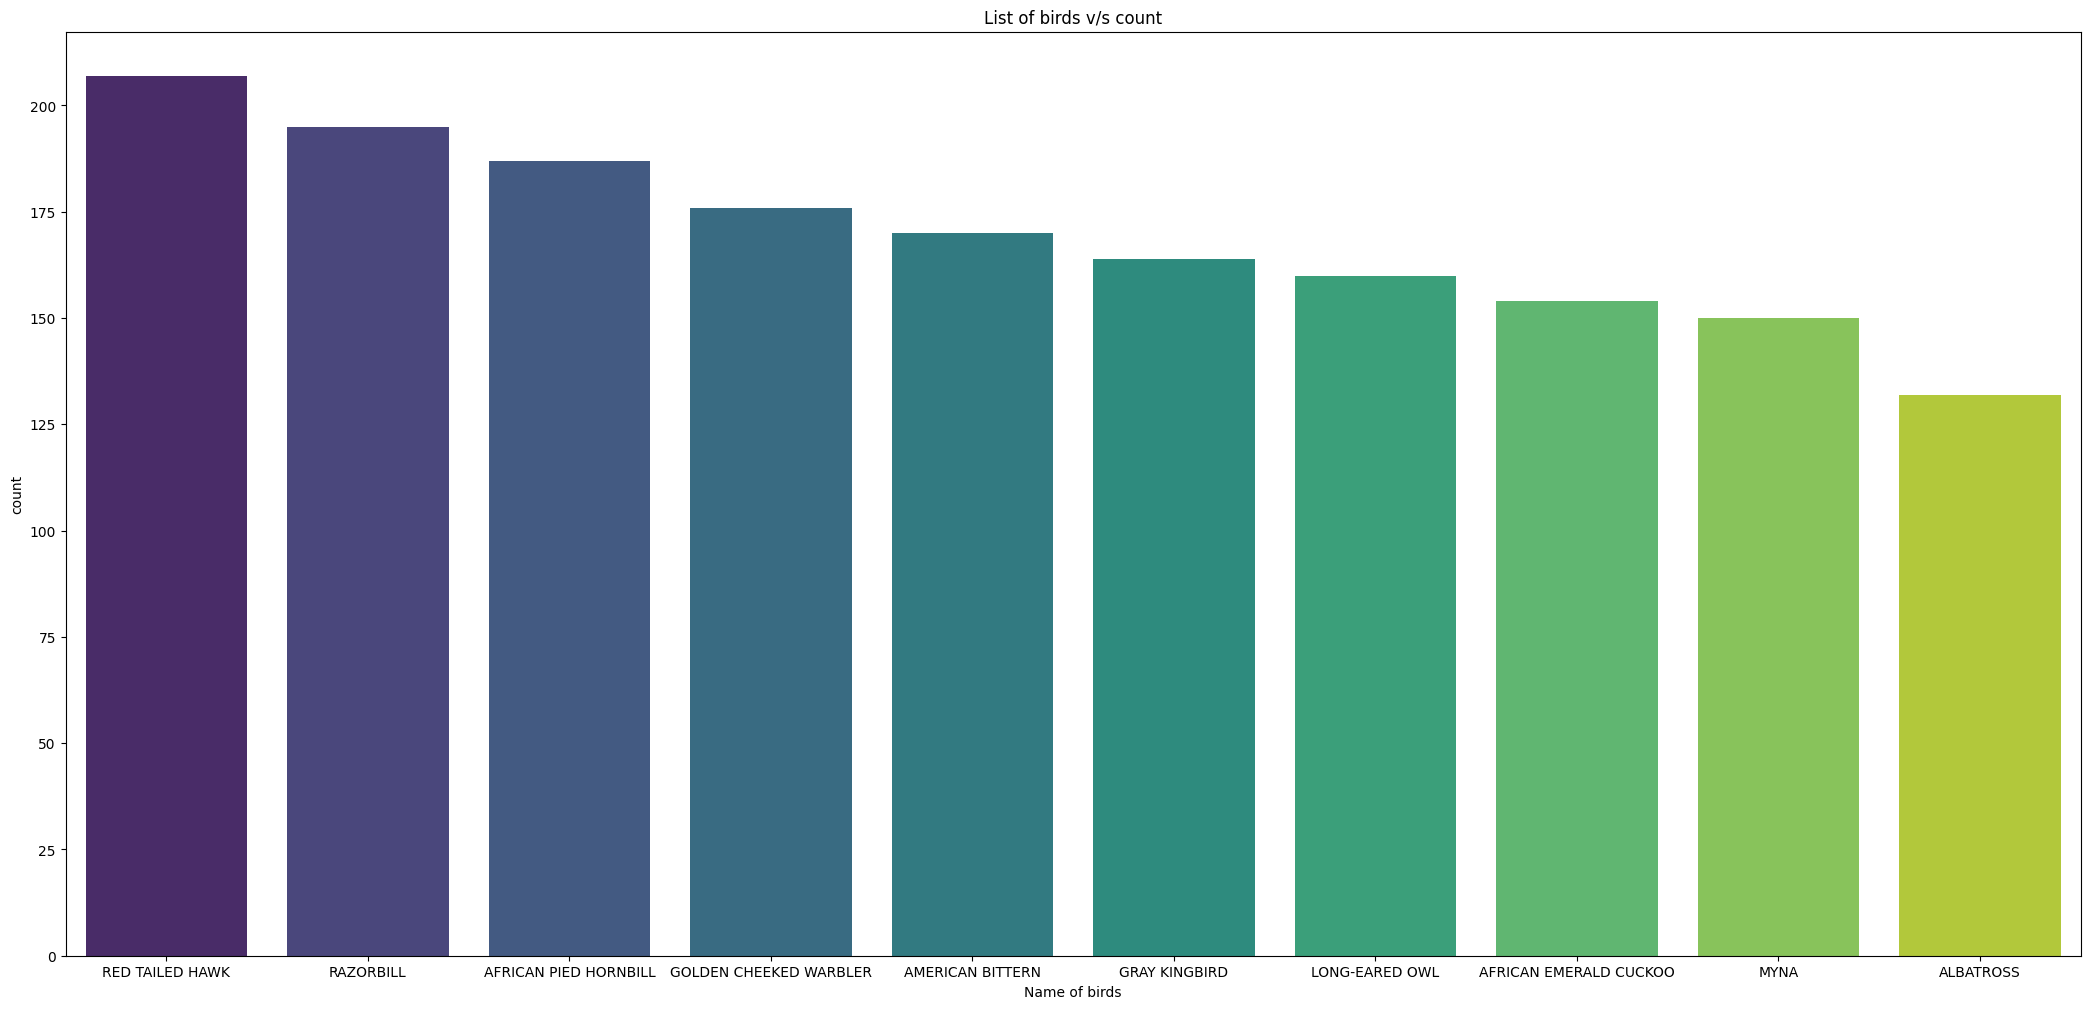

In [ ]:
# Get the labels and count
label_counts = image_df['Label'].value_counts()[:10]
plt.figure(figsize=(26, 12))

sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('List of birds v/s count')
plt.xlabel('Name of birds')
plt.ylabel('count')
plt.show()


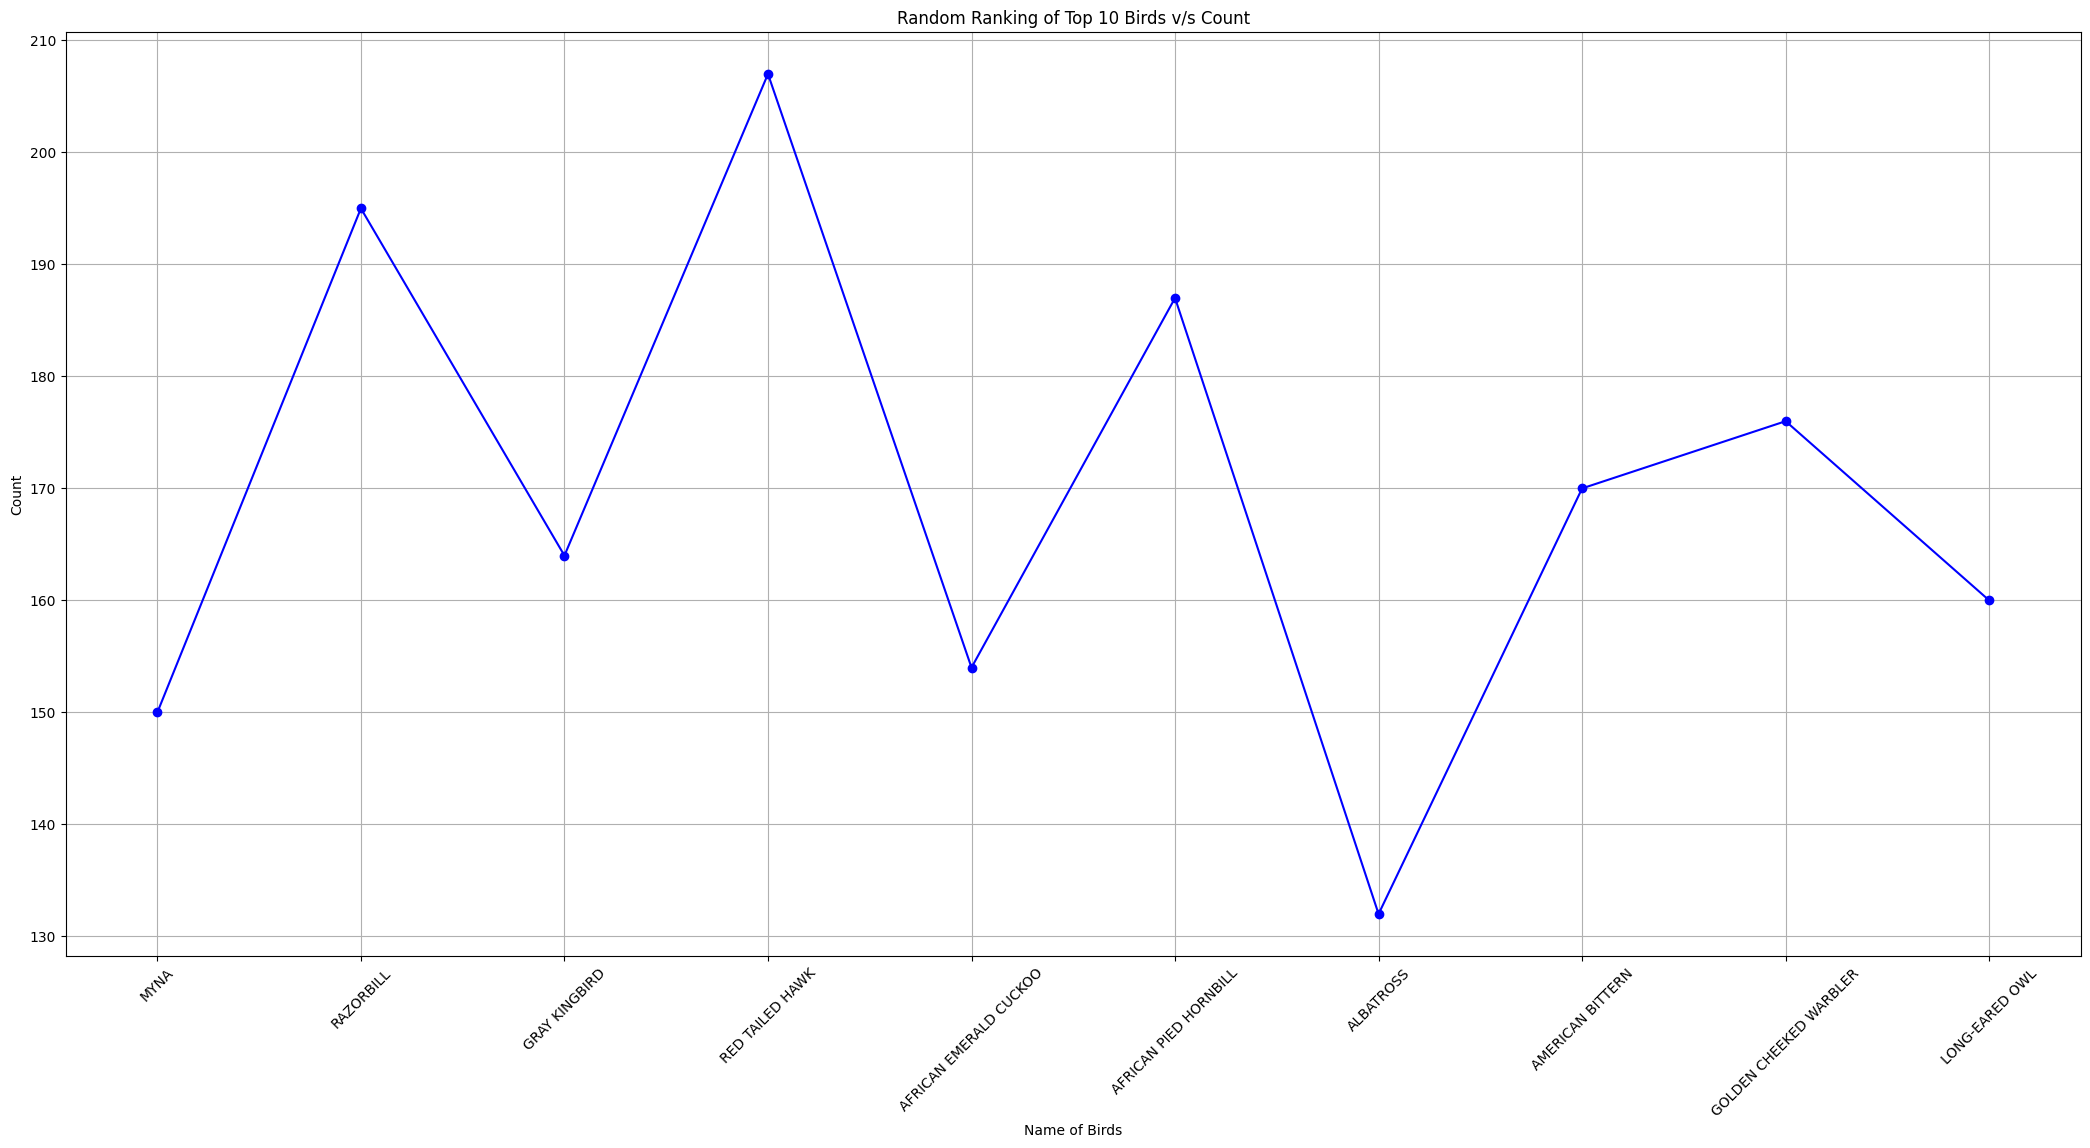

In [ ]:
# Get the labels and count

random_label_counts = label_counts.sample(frac=1, random_state=42)  # `random_state` for reproducibility

plt.figure(figsize=(26, 12))

# Use the randomized label counts for plotting
plt.plot(random_label_counts.index, random_label_counts.values, marker='o', linestyle='-', color='b')
plt.title('Random Ranking of Top 10 Birds v/s Count')
plt.xlabel('Name of Birds')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the bird names for better readability
plt.grid(True)  # Add a grid for easier reading of values
plt.show()

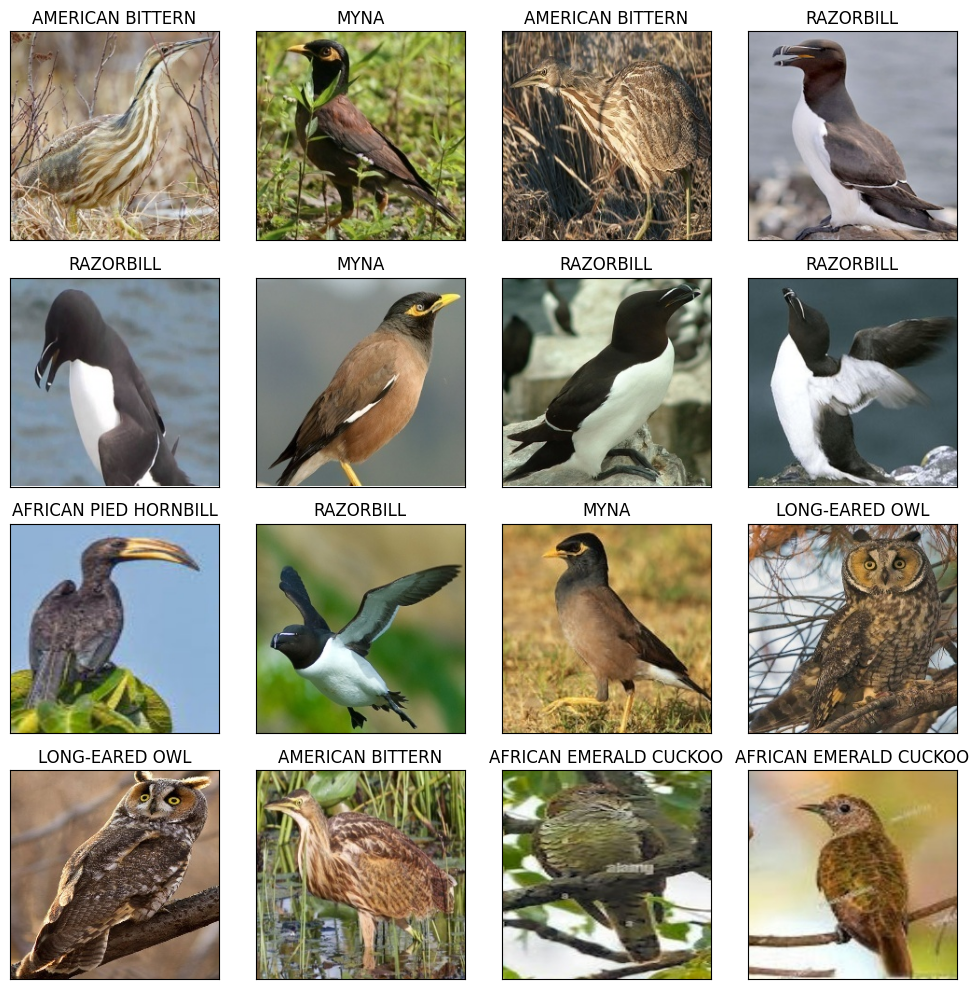

In [ ]:
random_index = np.random.randint(0, len(image_df),16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

In [ ]:
def compute_ela_cv(path, quality):
    temp_filename = 'temp_file_name.jpeg'
    SCALE = 15
    orig_img = cv2.imread(path)
    edited_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

    cv2.imwrite(temp_filename, edited_img, [cv2.IMWRITE_JPEG_QUALITY, quality])

    # read compressed image
    compressed_img = cv2.imread(temp_filename)

    # get absolute difference between img1 and img2 and multiply by scale
    diff = SCALE * cv2.absdiff(edited_img, compressed_img)
    return diff


# def convert_to_ela_image(path, quality):
#     temp_filename = 'temp_file_name.jpeg'
#     ela_filename = 'temp_ela.png'
#     image = Image.open(path).convert('RGB')
#     image.save(temp_filename, 'JPEG', quality = quality)
#     temp_image = Image.open(temp_filename)

#     ela_image = ImageChops.difference(image, temp_image)

#     extrema = ela_image.getextrema()
#     max_diff = max([ex[1] for ex in extrema])
#     if max_diff == 0:
#         max_diff = 1

#     scale = 255.0 / max_diff
#     ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)

#     return ela_image


def random_sample(path, extension=None):
    if extension:
        items = Path(path).glob(f'*.{extension}')
    else:
        items = Path(path).glob(f'*')

    items = list(items)

    p = random.choice(items)
    return p.as_posix()

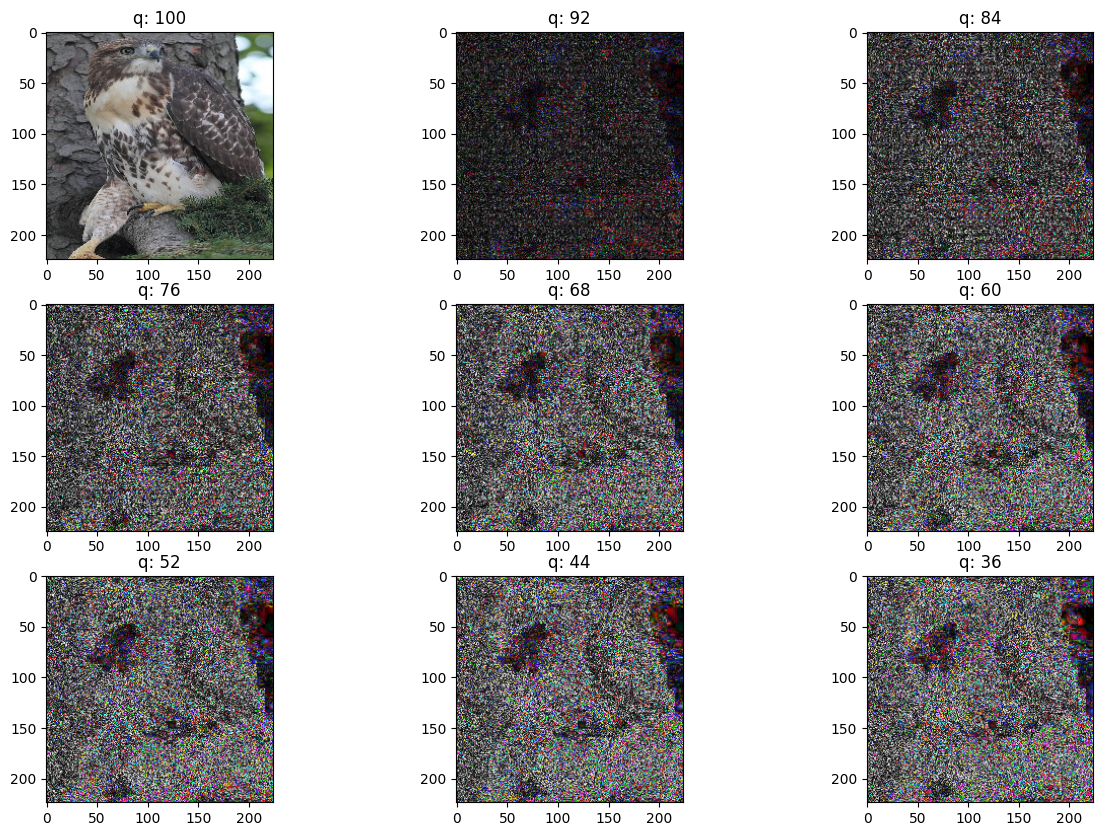

In [ ]:
# View random sample from the dataset
p = random_sample('../content/drive/MyDrive/Birds_data/train/RED TAILED HAWK')
orig = cv2.imread(p)
edited_img = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)/255.0
# orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB) / 255.0
# orig_img = cv2.imread(path)
# edited_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
init_val = 100
columns = 3
rows = 3

fig=plt.figure(figsize=(15, 10))
for i in range(1, columns*rows +1):
    quality=init_val - (i-1) * 8
    img = compute_ela_cv(path=p, quality=quality)
    if i == 1:
        img = edited_img.copy()
        # img
    ax = fig.add_subplot(rows, columns, i)
    ax.title.set_text(f'q: {quality}')
    plt.imshow(img)
plt.show()

In [ ]:
# Separate in train and test data
train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    validation_split=0.2
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
)

In [ ]:
BATCH_SIZE = 16
TARGET_SIZE = (128, 128)

In [ ]:
# Split the data into three categories.
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 1085 validated image filenames belonging to 10 classes.
Found 271 validated image filenames belonging to 10 classes.
Found 339 validated image filenames belonging to 10 classes.


In [ ]:
# Data Augmentation Step
augment = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(224,224),
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
  layers.experimental.preprocessing.RandomContrast(0.1),
])

In [ ]:
# Load the pretained model
pretrained_model = tf.keras.applications.efficientnet.EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

pretrained_model.trainable = False

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
# Create checkpoint callback
checkpoint_path = "birds_classification_model_checkpoint"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)

# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True) # if val loss decreases for 3 epochs in a row, stop training

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for our notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, pred_and_plot

--2024-03-11 21:26:12--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-03-11 21:26:12 (68.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
inputs = pretrained_model.input
x = augment(inputs)

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dropout(0.45)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.45)(x)


outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=Adam(0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=150,
    callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs",
                                    "bird_classification"),
        checkpoint_callback,
        reduce_lr
    ]
)

Saving TensorBoard log files to: training_logs/bird_classification/20240311-212613
Epoch 1/150
68/68 [==============================] - 355s 5s/step - loss: 3.1951 - accuracy: 0.1641 - val_loss: 1.3700 - val_accuracy: 0.6827 - lr: 1.0000e-04
Epoch 2/150
68/68 [==============================] - 38s 560ms/step - loss: 1.9426 - accuracy: 0.3539 - val_loss: 0.9460 - val_accuracy: 0.8155 - lr: 1.0000e-04
Epoch 3/150
68/68 [==============================] - 39s 577ms/step - loss: 1.4508 - accuracy: 0.5032 - val_loss: 0.6441 - val_accuracy: 0.8561 - lr: 1.0000e-04
Epoch 4/150
68/68 [==============================] - 37s 547ms/step - loss: 1.1724 - accuracy: 0.6009 - val_loss: 0.4629 - val_accuracy: 0.9151 - lr: 1.0000e-04
Epoch 5/150
68/68 [==============================] - 34s 497ms/step - loss: 0.9573 - accuracy: 0.6820 - val_loss: 0.3392 - val_accuracy: 0.9410 - lr: 1.0000e-04
Epoch 6/150
68/68 [==============================] - 33s 484ms/step - loss: 0.7684 - accuracy: 0.7475 - val_loss: 

In [ ]:
# Save the model here
# model.save('/content/drive/MyDrive/Colab Notebooks/my_model')
model.save('/content/drive/My Drive/Pickle_file/model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pickle

In [ ]:
# Specify the full path in Google Drive
model_path = '/content/drive/My Drive/Pickle_file/model.pkl'

# Assuming 'model' is your trained model
with open(model_path, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
# Load the model from the file
with open(model_path, 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/My Drive/Pickle_file/model.h5')

In [ ]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.10392
Test Accuracy: 97.05%


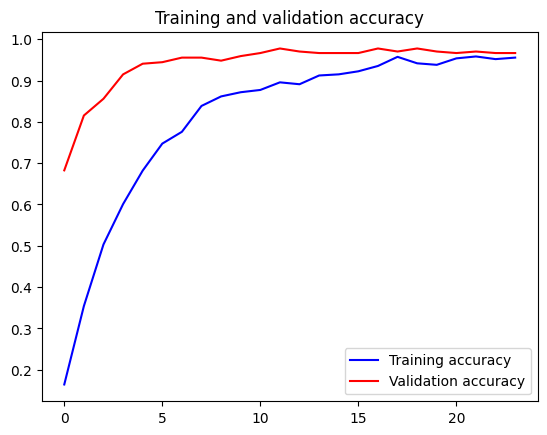

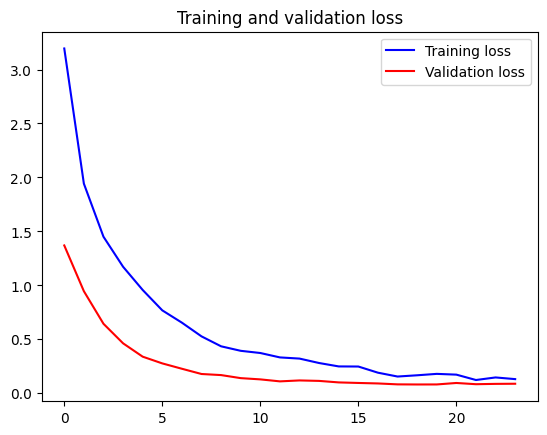

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()

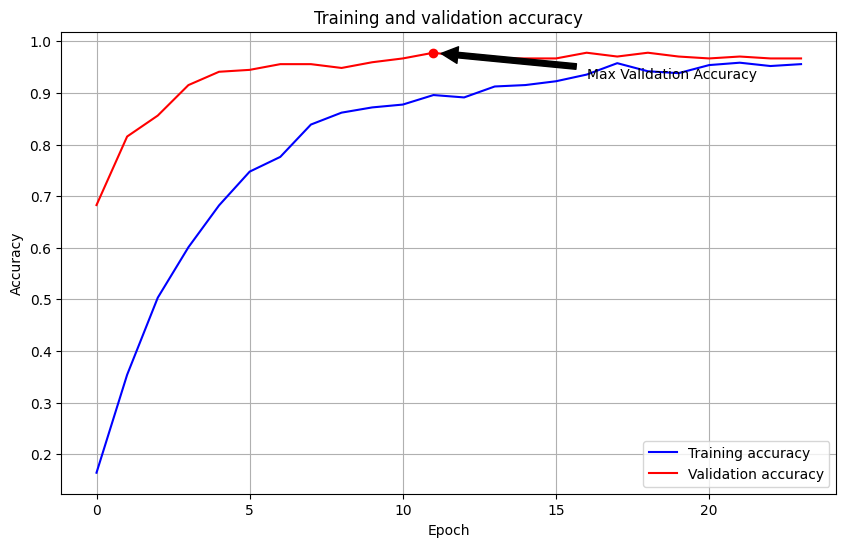

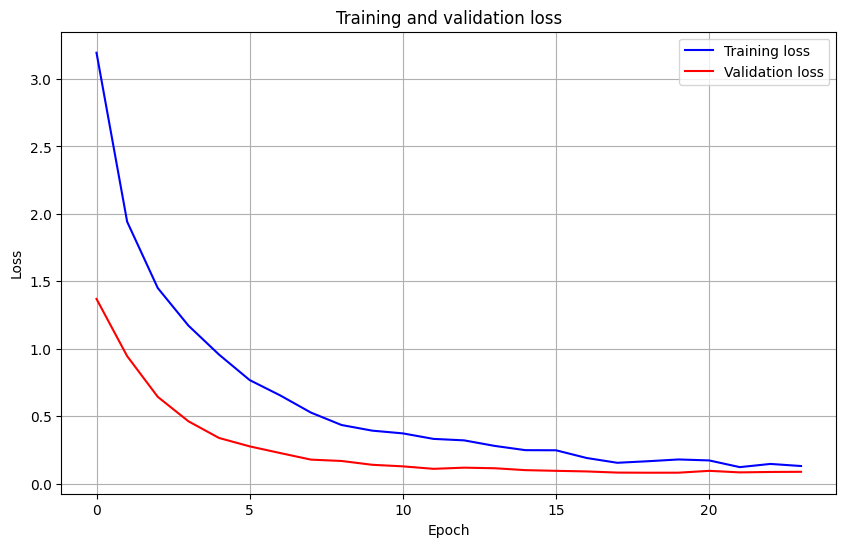

In [ ]:
import matplotlib.pyplot as plt

# Your existing code to plot accuracy and loss
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Highlighting the maximum validation accuracy
max_val_acc_epoch = val_accuracy.index(max(val_accuracy))
plt.plot(max_val_acc_epoch, max(val_accuracy), 'ro')  # 'ro' for red circle
plt.annotate(f'Max Validation Accuracy', xy=(max_val_acc_epoch, max(val_accuracy)), xytext=(max_val_acc_epoch+5, max(val_accuracy)-0.05),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [ ]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

In [ ]:
print(f"Max Training Accuracy: {max(training_accuracy)}")
print(f"Max Validation Accuracy: {max(validation_accuracy)}")

Max Training Accuracy: 0.9585253596305847
Max Validation Accuracy: 0.9778597950935364


In [ ]:
# Calculating the average training and validation accuracy across all epochs
average_training_accuracy = sum(training_accuracy) / len(training_accuracy)
average_validation_accuracy = sum(validation_accuracy) / len(validation_accuracy)

print(f"Average Training Accuracy: {average_training_accuracy * 100:.2f}%")
print(f"Average Validation Accuracy: {average_validation_accuracy * 100:.2f}%")

Average Training Accuracy: 80.87%
Average Validation Accuracy: 93.99%


In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

22/22 [==============================] - 11s 338ms/step
The first 5 predictions: ['GRAY KINGBIRD', 'AMERICAN BITTERN', 'MYNA', 'GRAY KINGBIRD', 'RAZORBILL']


In [ ]:
labels

{0: 'AFRICAN EMERALD CUCKOO',
 1: 'AFRICAN PIED HORNBILL',
 2: 'ALBATROSS',
 3: 'AMERICAN BITTERN',
 4: 'GOLDEN CHEEKED WARBLER',
 5: 'GRAY KINGBIRD',
 6: 'LONG-EARED OWL',
 7: 'MYNA',
 8: 'RAZORBILL',
 9: 'RED TAILED HAWK'}

In [ ]:
pred

['GRAY KINGBIRD',
 'AMERICAN BITTERN',
 'MYNA',
 'GRAY KINGBIRD',
 'RAZORBILL',
 'RED TAILED HAWK',
 'LONG-EARED OWL',
 'ALBATROSS',
 'MYNA',
 'AFRICAN EMERALD CUCKOO',
 'MYNA',
 'AFRICAN PIED HORNBILL',
 'RAZORBILL',
 'LONG-EARED OWL',
 'RED TAILED HAWK',
 'LONG-EARED OWL',
 'LONG-EARED OWL',
 'LONG-EARED OWL',
 'AMERICAN BITTERN',
 'AFRICAN PIED HORNBILL',
 'LONG-EARED OWL',
 'ALBATROSS',
 'GOLDEN CHEEKED WARBLER',
 'RAZORBILL',
 'AFRICAN EMERALD CUCKOO',
 'GOLDEN CHEEKED WARBLER',
 'RAZORBILL',
 'GOLDEN CHEEKED WARBLER',
 'LONG-EARED OWL',
 'RED TAILED HAWK',
 'ALBATROSS',
 'AMERICAN BITTERN',
 'GRAY KINGBIRD',
 'RED TAILED HAWK',
 'RED TAILED HAWK',
 'RED TAILED HAWK',
 'RAZORBILL',
 'GOLDEN CHEEKED WARBLER',
 'AMERICAN BITTERN',
 'MYNA',
 'MYNA',
 'AFRICAN PIED HORNBILL',
 'AMERICAN BITTERN',
 'AFRICAN EMERALD CUCKOO',
 'MYNA',
 'RED TAILED HAWK',
 'LONG-EARED OWL',
 'GOLDEN CHEEKED WARBLER',
 'RAZORBILL',
 'RAZORBILL',
 'ALBATROSS',
 'AMERICAN BITTERN',
 'ALBATROSS',
 'AFRICAN EM

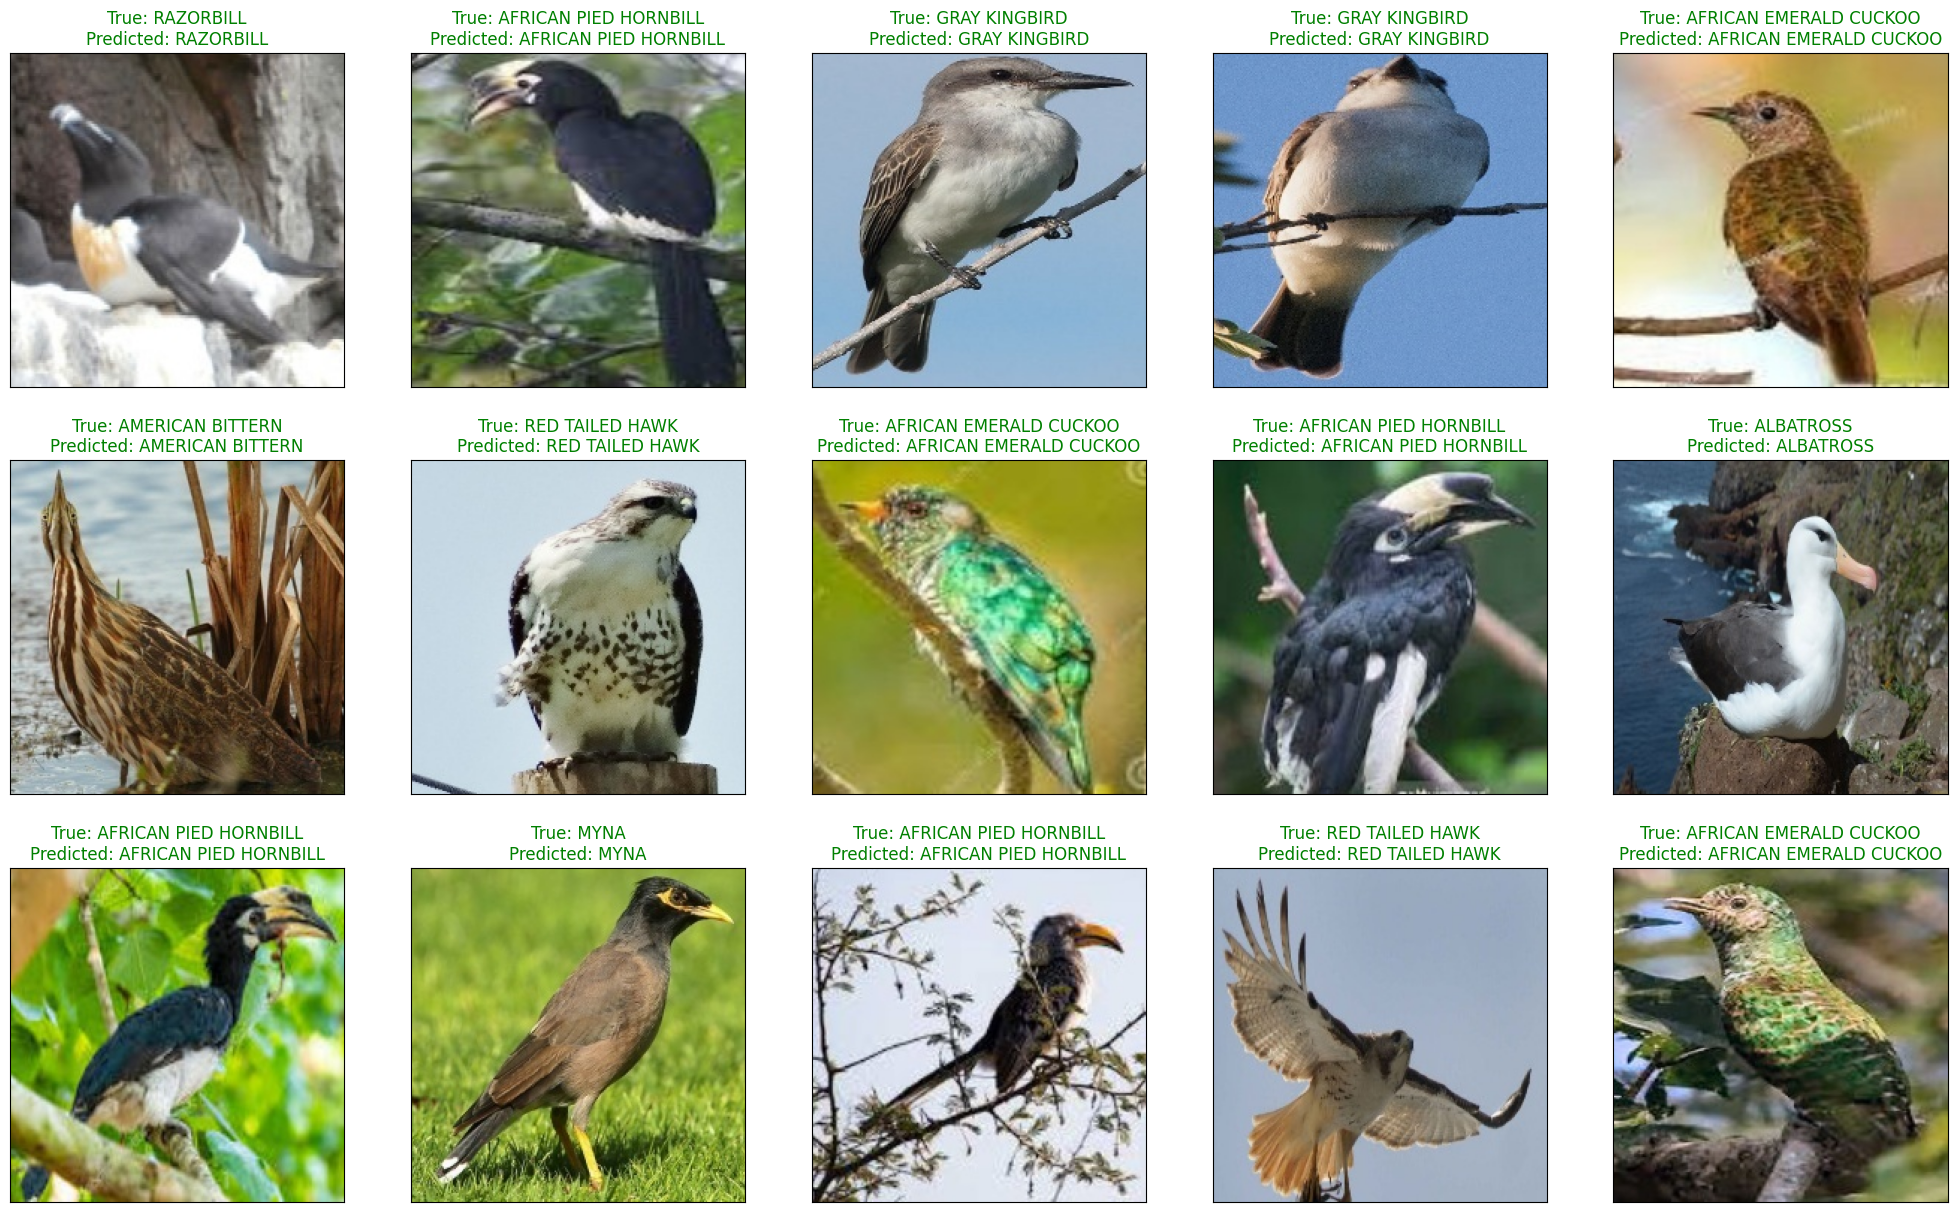

<Figure size 640x480 with 0 Axes>

In [ ]:
  # Display 25 random pictures from the dataset with their labels
random_index = np.random.randint(0, len(test_df) - 1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[random_index[i]]))
    if test_df.Label.iloc[random_index[i]] == pred[random_index[i]]:
        color = "green"
    else:
        color = "red"
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()

In [ ]:
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

                        precision    recall  f1-score   support

AFRICAN EMERALD CUCKOO       1.00      1.00      1.00        35
 AFRICAN PIED HORNBILL       1.00      1.00      1.00        37
             ALBATROSS       0.93      0.96      0.95        27
      AMERICAN BITTERN       1.00      0.97      0.98        29
GOLDEN CHEEKED WARBLER       1.00      1.00      1.00        34
         GRAY KINGBIRD       0.97      0.97      0.97        30
        LONG-EARED OWL       0.97      0.90      0.93        31
                  MYNA       1.00      0.97      0.98        33
             RAZORBILL       0.95      0.95      0.95        39
       RED TAILED HAWK       0.91      0.98      0.95        44

              accuracy                           0.97       339
             macro avg       0.97      0.97      0.97       339
          weighted avg       0.97      0.97      0.97       339



In [ ]:
report = classification_report(y_test, pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df

precision    recall  f1-score     support
AFRICAN EMERALD CUCKOO   1.000000  1.000000  1.000000   35.000000
AFRICAN PIED HORNBILL    1.000000  1.000000  1.000000   37.000000
ALBATROSS                0.928571  0.962963  0.945455   27.000000
AMERICAN BITTERN         1.000000  0.965517  0.982456   29.000000
GOLDEN CHEEKED WARBLER   1.000000  1.000000  1.000000   34.000000
GRAY KINGBIRD            0.966667  0.966667  0.966667   30.000000
LONG-EARED OWL           0.965517  0.903226  0.933333   31.000000
MYNA                     1.000000  0.969697  0.984615   33.000000
RAZORBILL                0.948718  0.948718  0.948718   39.000000
RED TAILED HAWK          0.914894  0.977273  0.945055   44.000000
accuracy                 0.970501  0.970501  0.970501    0.970501
macro avg                0.972437  0.969406  0.970630  339.000000
weighted avg             0.971262  0.970501  0.970580  339.000000

In [ ]:
def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size "size"
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

# Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]
    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)
    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
#     display(Image(cam_path))

    return cam_path

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

last_conv_layer_name = "top_conv"
img_size = (224,224, 3)

# Remove last layer's softmax
model.layers[-1].activation = None

<ipython-input-39-d87a99df5208>:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


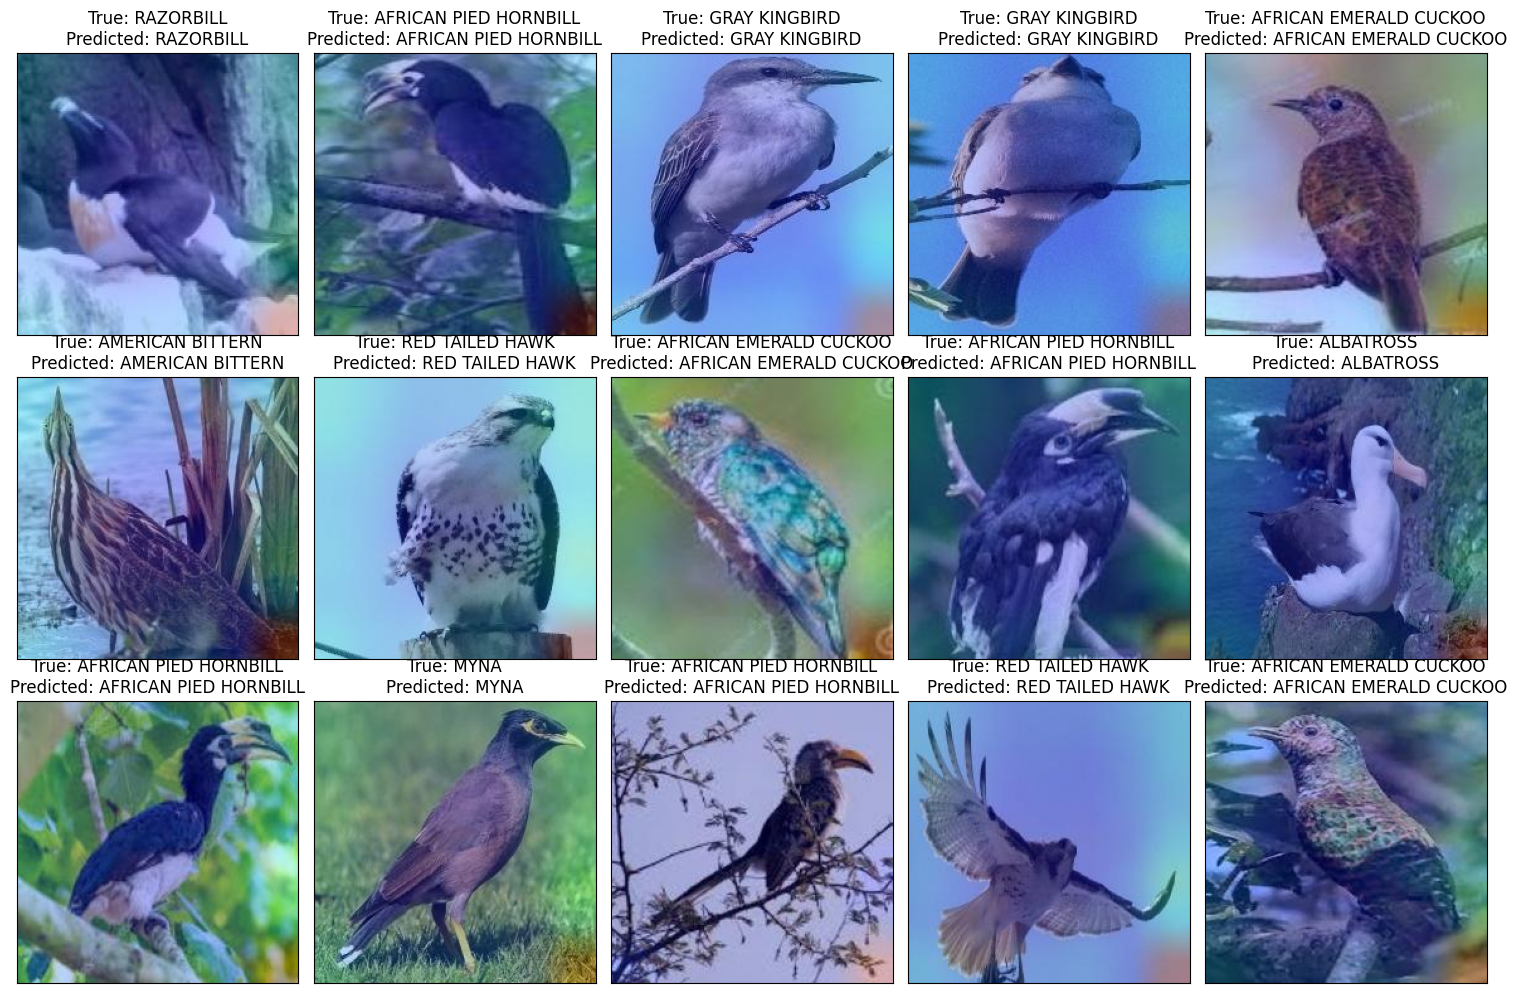

In [ ]:
# Display the part of the pictures used by the neural network to classify the pictures
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img_path = test_df.Filepath.iloc[random_index[i]]
    img_array = preprocess_input(get_img_array(img_path, size=img_size))
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    cam_path = save_and_display_gradcam(img_path, heatmap)
    ax.imshow(plt.imread(cam_path))
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}")
plt.tight_layout()
plt.show()

In [ ]:
# model.save('/content/drive/MyDrive/Colab Notebooks/my_model')
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/my_model')

In [ ]:
def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)
    return img_array

In [ ]:
def predict_image(model, processed_image):
    predictions = model.predict(processed_image)
    predicted_class = np.argmax(predictions, axis=1)
    return predicted_class

In [ ]:
labels_dict = {0: 'AFRICAN EMERALD CUCKOO',
 1: 'AFRICAN PIED HORNBILL',
 2: 'ALBATROSS',
 3: 'AMERICAN BITTERN',
 4: 'GOLDEN CHEEKED WARBLER',
 5: 'GRAY KINGBIRD',
 6: 'LONG-EARED OWL',
 7: 'MYNA',
 8: 'RAZORBILL',
 9: 'RED TAILED HAWK'}

In [ ]:
# # Assuming 'filepaths' is already defined and contains the paths to your image files

# # Extract labels from filepaths
# labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

# # Create a Series from labels
# labels_series = pd.Series(labels)

# # Convert the Series to a dictionary with numerical indices as keys and labels as values
# labels_dict = labels_series.to_dict()

# # Adjusting the dictionary to start indices from 0, if needed
# labels_dict = {i: label for i, label in enumerate(labels_dict.values())}

In [ ]:
labels_dict

{0: 'AFRICAN EMERALD CUCKOO',
 1: 'AFRICAN PIED HORNBILL',
 2: 'ALBATROSS',
 3: 'AMERICAN BITTERN',
 4: 'GOLDEN CHEEKED WARBLER',
 5: 'GRAY KINGBIRD',
 6: 'LONG-EARED OWL',
 7: 'MYNA',
 8: 'RAZORBILL',
 9: 'RED TAILED HAWK'}

In [ ]:
def get_class_label(class_index):
    # Assuming you have a dictionary that maps class indices to labels
    # labels = {0: 'Class1', 1: 'Class2', ...}  # Fill in your actual labels
    return labels_dict[class_index]

In [ ]:
# Load a new image
# image_path = '/content/drive/MyDrive/Birds_data/train/GRAY KINGBIRD/001.jpg'
# image_path = '/content/drive/MyDrive/Birds_data/train/RED TAILED HAWK/001.jpg'
image_path = '/content/drive/MyDrive/Birds_data/red_tailed_hawk.jpg'
processed_image = preprocess_image(image_path)

# Predict the image's class
predicted_class_index = predict_image(model, processed_image)

# Get the class label
class_label = get_class_label(predicted_class_index.item())

print(f'Predicted index: {predicted_class_index.item()}')
print(f'Predicted class: {class_label}')
# print({predicted_class_index.item(): 'Class label'})

1/1 [==============================] - 3s 3s/step
Predicted index: 9
Predicted class: RED TAILED HAWK
